## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
unique_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
value_counts = application_df['APPLICATION_TYPE'].value_counts()
value_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 160
application_types_to_replace = value_counts[value_counts < threshold].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
filtered_counts = class_counts[class_counts > 1]
filtered_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
threshold = 1880
classifications_to_replace = class_counts[class_counts < threshold].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df = application_df.drop(columns=['STATUS'])
application_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,108590,1,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,5000,0,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6692,1,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,142590,1,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,5000,0,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,5000,0,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,5000,1,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model with consistent input dimensions
nn = tf.keras.models.Sequential()

# Input layer - X_train_scaled.shape[1] ensures we're using the right number of features
input_dim = X_train_scaled.shape[1]

# First hidden layer - increased units for better feature representation
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=input_dim))
nn.add(tf.keras.layers.Dropout(0.2))  # Add dropout to prevent overfitting

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))
nn.add(tf.keras.layers.Dropout(0.2))  # Add dropout to prevent overfitting

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3440      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5901 (23.05 KB)
Trainable params: 5901 (23.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Add early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [14]:
# Train the model
history = nn.fit(
    X_train_scaled, 
    y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
644/644 [==============================] - 1s 875us/step - loss: 0.5966 - accuracy: 0.7043 - val_loss: 0.5587 - val_accuracy: 0.7343
Epoch 2/100
644/644 [==============================] - 0s 634us/step - loss: 0.5697 - accuracy: 0.7225 - val_loss: 0.5506 - val_accuracy: 0.7335
Epoch 3/100
644/644 [==============================] - 0s 587us/step - loss: 0.5660 - accuracy: 0.7229 - val_loss: 0.5534 - val_accuracy: 0.7351
Epoch 4/100
644/644 [==============================] - 0s 611us/step - loss: 0.5634 - accuracy: 0.7248 - val_loss: 0.5498 - val_accuracy: 0.7329
Epoch 5/100
644/644 [==============================] - 0s 713us/step - loss: 0.5620 - accuracy: 0.7269 - val_loss: 0.5483 - val_accuracy: 0.7343
Epoch 6/100
644/644 [==============================] - 0s 654us/step - loss: 0.5592 - accuracy: 0.7282 - val_loss: 0.5467 - val_accuracy: 0.7345
Epoch 7/100
644/644 [==============================] - 0s 727us/step - loss: 0.5598 - accuracy: 0.7279 - val_loss: 0.5456 - val_ac

268/268 - 0s - loss: 0.5532 - accuracy: 0.7285 - 109ms/epoch - 407us/step
Loss: 0.553159773349762, Accuracy: 0.7285131216049194


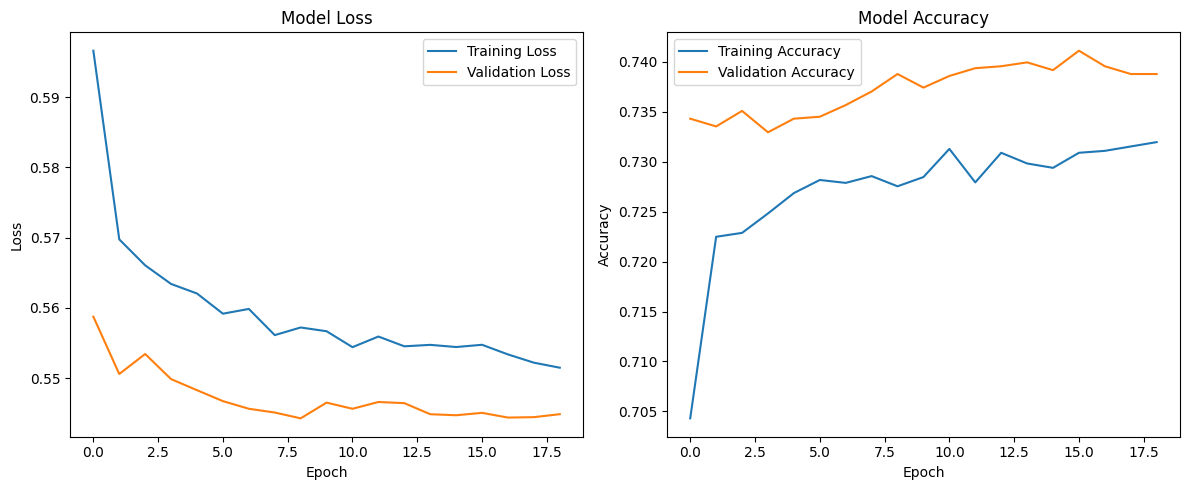

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization_Improved.h5')

# Load the model from the HDF5 file
import tensorflow as tf

# Load the model from the HDF5 file
loaded_model = tf.keras.models.load_model('AlphabetSoupCharity_Optimization_Improved.h5')

# Verify the model was loaded correctly by printing its summary
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3440      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5901 (23.05 KB)
Trainable params: 5901 (23.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
